<a href="https://colab.research.google.com/github/Namesakenberg/Hyperparameter-Hangout/blob/main/hypothesis_testing_session_46_Ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [75]:
df = pd.read_csv('/titanic_full.csv')

In [17]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [19]:
df.isnull().sum()

,0
pclass,1
survived,1
name,1
sex,1
age,264
sibsp,1
parch,1
ticket,1
fare,2
cabin,1015


# 1 sample tTest

# if the assumption is made that the average age of the population is 35 , is the assumption true ? consider a sample of size 25

In [20]:
#  hypothesis : the average age of the passengers travelling is 35
# perform a hypothesis test for the above assumption

In [21]:
# null hypo : mean_age = 35
# alternate hypo : mean_age != 35

pop=df['age'].dropna()
sample = pop.sample(25).values
mean = 35


In [22]:
sample

array([47.  , 35.  ,  4.  , 28.  , 36.  , 36.5 , 29.  , 29.  , 36.  ,
       34.  ,  7.  ,  8.  , 21.  , 18.  , 41.  , 42.  , 31.  , 17.  ,
        0.75, 38.  , 17.  , 32.  , 28.  , 17.  , 36.  ])

In [23]:
X = sample.mean()
S  = sample.std()
n  = 25

In [24]:
# since the number of samples <30 we need to prove that the sample is taken from the population following normal distribution

In [25]:
from scipy.stats import shapiro
shapiro_age = shapiro(sample)

In [26]:
shapiro_age

ShapiroResult(statistic=0.9356772815087029, pvalue=0.11758778860706309)

In [27]:
# since the shapiro's p value is more than 0.05 the samples follow normal distribution

In [28]:
tstatistic , pvalue = stats.ttest_1samp(sample,mean)

In [29]:
print('tstatistic : ',tstatistic)
print('pvalue : ',pvalue/2) # as we are calculatig 2 tailed test divide the p value by 2

tstatistic :  -3.2717790515793332
pvalue :  0.0016131992156270464


In [30]:
# since the p value is smaller than 0.05 , the null hypothesis is proved wrong (rejected)
# hence our assumption to say that the mean age is 35 is false

In [31]:
# checking the results
pop.mean()

29.8811345124283

In [32]:
# hence the answer is corrcet the considered assumption of mean being equal to 35 is FALSE

# Independent 2 sample t-tests

## consider the owner of a website claimed that the amount of time spent by the users on the website from the phone and from the desktop is the same.check whether this assumption is correct on the given data
## the data has 30 samples of both the desktop and the mobile users
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]


mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]


In [33]:
# this is an example of the 2 sample t tests
# check the conditions before application
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]


# 1) the data must be independent of each other : true
# 2) the data must be random : true
# 3) the variance of both of the datas must be equal

from scipy.stats import levene
levene_res = levene(desktop_users , mobile_users)
levene_res
# since the p value of the levene test is greater than 0.05 the variance of both of the datas are equal

# 4) the datas should follow the normal distribution
# since the data points are equal to 30 in each of the datas they will naturally follow the central limit theorem

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)

In [34]:
# calculagting the p values
desktop_mean = np.mean(desktop_users)
desktop_stddev = np.std(desktop_users,ddof=1)

mobile_mean = np.mean(mobile_users)
mobile_stddev = np.std(mobile_users)

t_val = (desktop_mean-mobile_mean) / ((((desktop_stddev)**2/30)+((mobile_stddev)**2/30))**0.5)
t_val

4.653131015000176

In [35]:
from scipy.stats import t
dof = 58
t_value = -1*t_val
cdf_val = t.cdf(t_value,dof)
cdf_val*2
p_value = float(cdf_val*2)
p_value

1.942355177210593e-05

In [37]:
# the above p value is very close to zero as it its in the exponential form hence
# as the p-value < 0.05 the null hypothesis is rejected
# hence the claim made by the owener is FALSE

## example 2 :
### hypothesis : The average age of the male passengers is significantly greater than the average age of the female passengers.



In [136]:
# the hypothesis clearly says that the average age of males is greater than the average female age  hence it is a single tailed test

In [52]:
n_males =df[df['sex']=='male'].shape[0]
n_females = df[df['sex']=='female'].shape[0]

In [95]:
df = df[['sex','age']].dropna()

In [97]:
df_male = df[df['sex']=='male']['age']
df_female=df[df['sex']=='female']['age']

In [122]:
# draw a sample of 30 values from males and from females , calculate mean and std. from it
# use fromula
male_sample=[]
male_sample=df_male.sample(25)
male_sample=np.array(male_sample)
male_sample

array([19. , 39. ,  1. , 17. , 34. , 18. , 30. , 41. , 28.5, 27. , 48. ,
       27. , 40.5, 28. , 22. ,  6. , 29. , 34. , 32. , 23. , 40. , 32. ,
       21. , 30. , 28. ])

In [123]:
female_sample = []
female_sample = df_female.sample(25)
female_sample = np.array(female_sample)
female_sample

array([14. , 35. , 14. , 48. , 18. , 35. , 22. , 22. , 32.5, 39. , 34. ,
       27. , 31. , 32. , 27. , 31. , 38. , 24. , 16. , 33. , 45. ,  1. ,
       43. , 18. , 39. ])

In [124]:
X1 = np.mean(male_sample)
s1 = np.std(male_sample)
n1 = 25

X2 = np.mean(female_sample)
s2 = np.std(female_sample)
n2 = 25

In [ ]:
# since the samples are lesser than 30
# we need to check whether they follow normal distribution  using the shapiro test

In [125]:
from scipy.stats import shapiro
shapiro_male = shapiro(male_sample)
shapriro_female = shapiro(female_sample)
print('the shapiro pvalue for male sample is :',shapiro_male)
print('the shapiro pvalue for female sample is :',shapriro_female)

the shapiro pvalue for male sample is : ShapiroResult(statistic=0.9601720790796116, pvalue=0.41791313595300816)
the shapiro pvalue for female sample is : ShapiroResult(statistic=0.9725944894842715, pvalue=0.7112199128173866)


In [ ]:
# since both of the pvalues are greater than 0.05 both the male and the female datas follow the normal distribution

In [126]:
from scipy.stats import levene
levene(male_sample , female_sample)

LeveneResult(statistic=0.2832741020181818, pvalue=0.5970184109505892)

In [ ]:
# since levens pvalue is greater than 0.05 (alpha) the variance of the 2 samples are equal

In [127]:
t_val = (X1 - X2)/(((s1**2)/n1) + ((s2**2)/n2))**0.5
t_val

-0.31017703931210094

In [131]:
from scipy.stats import t
dof = (n1+n2-2)
pvalue = t.cdf(t_val,dof)
print('pvalue : ',pvalue)

pvalue :  0.3788845522449734


In [ ]:
# doing same using the inbuilt function

In [135]:
tstat , p_val  = stats.ttest_ind(male_sample,female_sample)
p_val = p_val /2 # divide the p_val by 2 as it is a single tailed test
print("p_value ",p_val)

p_value  0.38125493850382064


In [ ]:
# since p value > alpha null hypothesis is true
# hence the mean age of male is equal to mean age of females

In [129]:
df_male.mean()

30.5852329787234

In [130]:
df_female.mean()

28.6870706185567

## example on 3rd type of t test :  paired T test
## Q)A weight loss camp has 15 people signed up.

weight before : [80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91]

weight after : [78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88]

# the objective is to check whether there is a significant weight loss after the camp

significance level = 0.05

In [137]:
before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [138]:
difference = after-before

<Axes: ylabel='Density'>

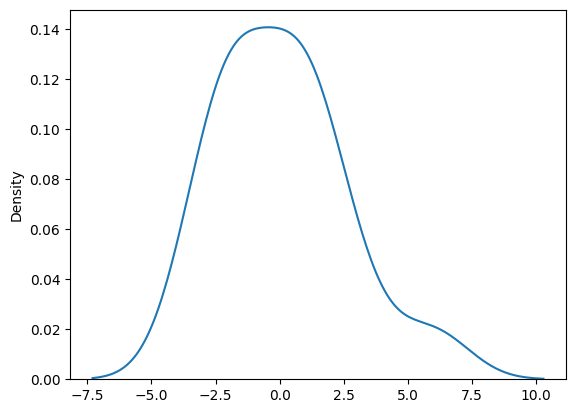

In [139]:
# check whether the distribution is normal
sns.kdeplot(difference)

In [141]:
mean  = np.mean(difference)
std_dev = np.std(difference , ddof=1)
n = len(difference)
dof =n-1

In [143]:
t_statistic = mean/ (std_dev/(n)**0.5)
t_statistic

0.10482848367219182

In [146]:
p_value = stats.t.cdf(t_statistic,dof)
p_value

0.5415256331781837

In [ ]:
# since p value > alpha
# null hypothesis  is true
# hence there is no significant effect in weight after the weight loss camp